In [169]:
import numpy as np
import os
from utils.input_data import read_data_sets
import utils.datasets as ds
import utils.augmentation as aug
import utils.helper as hlp
import matplotlib.pyplot as plt


In [170]:
dataset = "CBF"

nb_class = ds.nb_classes(dataset)
nb_dims = ds.nb_dims(dataset)


In [171]:
# Load Data
train_data_file = os.path.join("data", dataset, "%s_TRAIN.tsv" % dataset)
test_data_file = os.path.join("data", dataset, "%s_TEST.tsv" % dataset)

x_train, y_train, x_test, y_test = read_data_sets(
    train_data_file, "", test_data_file, "", delimiter="\t"
)

y_train = ds.class_offset(y_train, dataset)
y_test = ds.class_offset(y_test, dataset)
nb_timesteps = int(x_train.shape[1] / nb_dims)
input_shape = (nb_timesteps, nb_dims)

x_train_max = np.max(x_train)
x_train_min = np.min(x_train)
x_train = 2.0 * (x_train - x_train_min) / (x_train_max - x_train_min) - 1.0
# Test is secret
x_test = 2.0 * (x_test - x_train_min) / (x_train_max - x_train_min) - 1.0

x_test = x_test.reshape((-1, input_shape[0], input_shape[1]))
x_train = x_train.reshape((-1, input_shape[0], input_shape[1]))


## Original


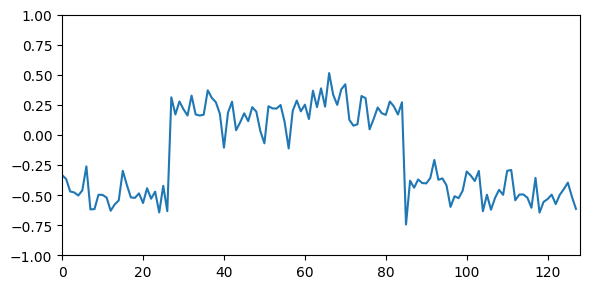

In [172]:
hlp.plot1d(x_train[0])


## Jittering


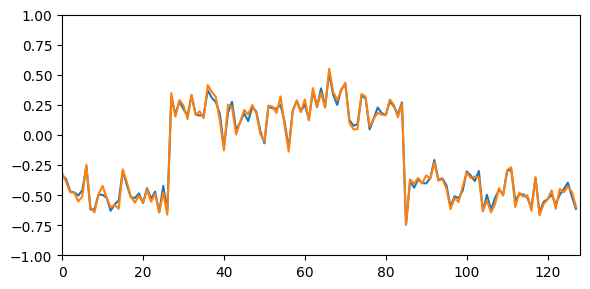

In [173]:
hlp.plot1d(x_train[0], aug.jitter(x_train, sigma=0.03)[0])


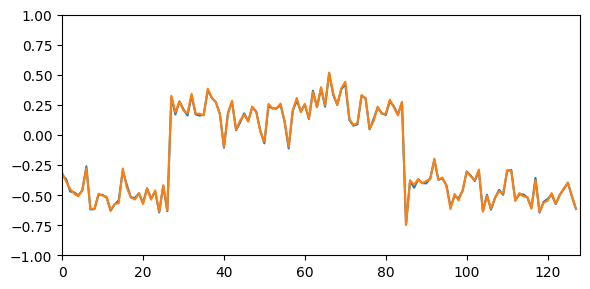

In [174]:
hlp.plot1d(x_train[0], aug.jitter(x_train, sigma=0.01)[0])


## Scaling


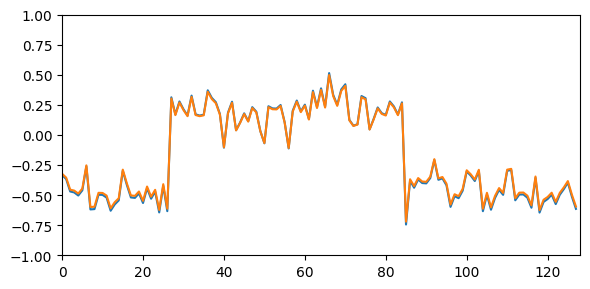

In [175]:
hlp.plot1d(x_train[0], aug.scaling(x_train, sigma=0.05)[0])


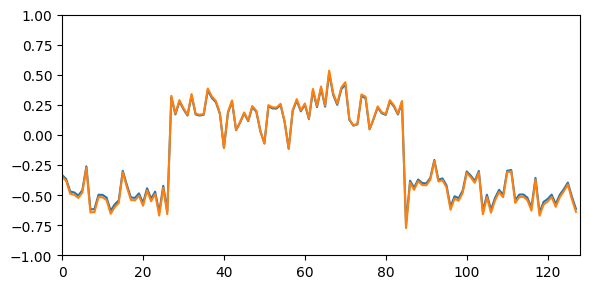

In [176]:
hlp.plot1d(x_train[0], aug.scaling(x_train, sigma=0.08)[0])


In [177]:
#hlp.plot1d(x_train[0], aug.pemrmutation(x_train.numpy())[0])


## Magnitude Warping


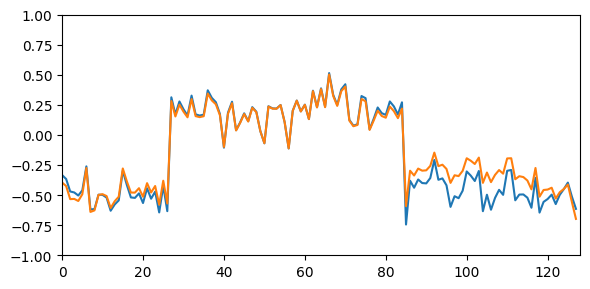

In [178]:
hlp.plot1d(x_train[0], aug.magnitude_warp(x_train)[0])


## Time Warping


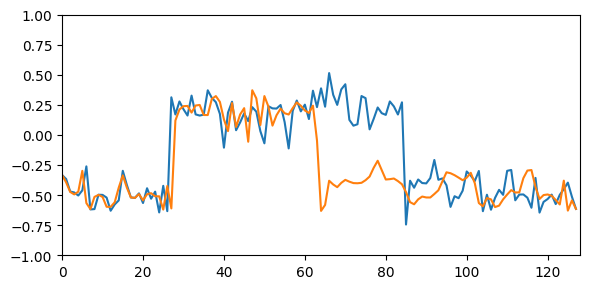

In [179]:
hlp.plot1d(x_train[0], aug.time_warp(x_train)[0])


## Rotation


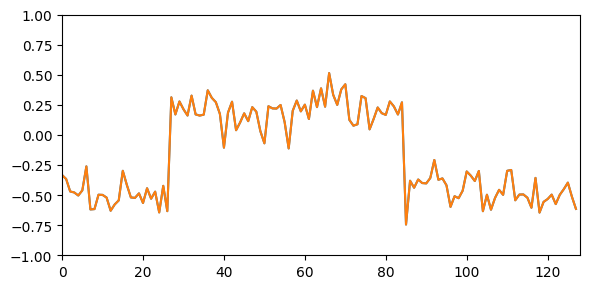

In [180]:
hlp.plot1d(x_train[0], aug.rotation(x_train)[0])


## Window Slicing


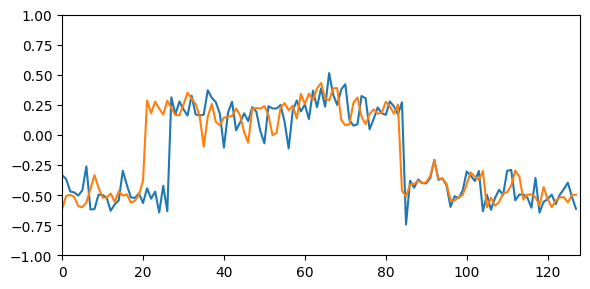

In [218]:
hlp.plot1d(x_train[0], aug.window_slice(x_train, reduce_ratio=0.9)[0])


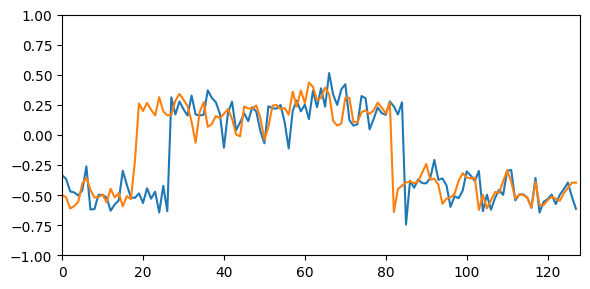

In [242]:
hlp.plot1d(x_train[0], aug.window_slice(x_train, reduce_ratio=0.9)[0])


## Window Warping


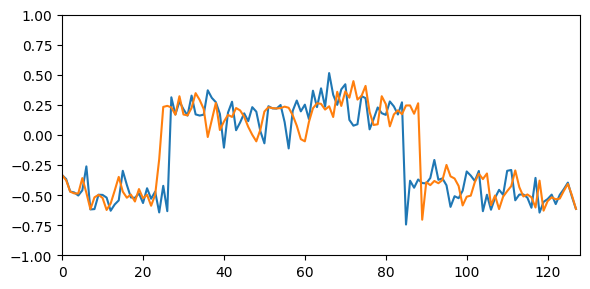

In [209]:
hlp.plot1d(x_train[0], aug.window_warp(x_train, window_ratio=0.1, scales=[0.5, 2.])[0])


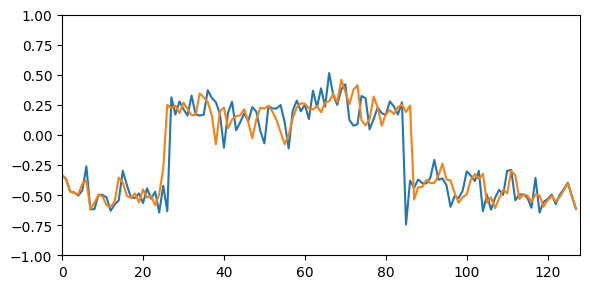

In [217]:
hlp.plot1d(x_train[0], aug.window_warp(x_train, window_ratio=0.05, scales=[0.1, 2.])[0])


## Permutation

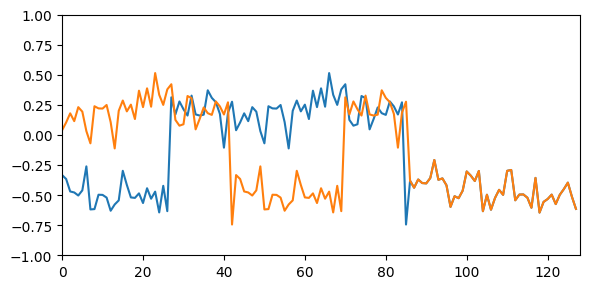

In [208]:
hlp.plot1d(x_train[0], aug.permutation(x_train, max_segments=3, seg_mode="equal")[0])


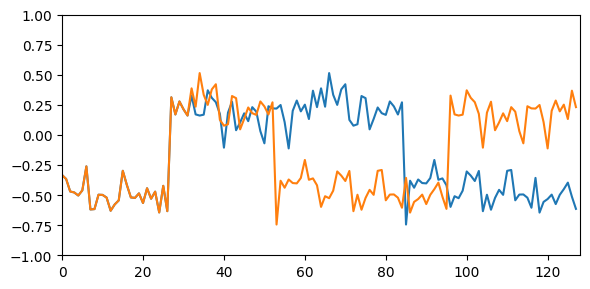

In [254]:
hlp.plot1d(x_train[0], aug.permutation(x_train, max_segments=4, seg_mode="equal")[0])


## Suboptimal Warping Time Series Generator (SPAWNER)


In [183]:
hlp.plot1d(x_train[0], aug.spawner(x_train, y_train)[0])


AttributeError: module 'utils.augmentation' has no attribute 'spawner'

## Weighted Dynamic Time Series Barycenter Averaging (wDBA)


100%|██████████| 30/30 [00:04<00:00,  6.79it/s]


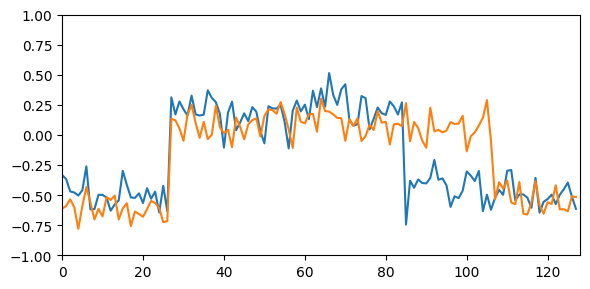

In [ ]:
hlp.plot1d(x_train[0], aug.wdba(x_train, y_train)[0])


## Random Guided Warping


100%|██████████| 30/30 [00:00<00:00, 222.80it/s]


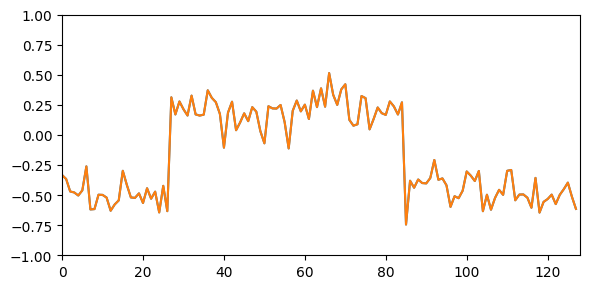

In [ ]:
hlp.plot1d(x_train[0], aug.random_guided_warp(x_train, y_train)[0])


## Discriminative Guided Warping


100%|██████████| 30/30 [00:01<00:00, 16.72it/s]


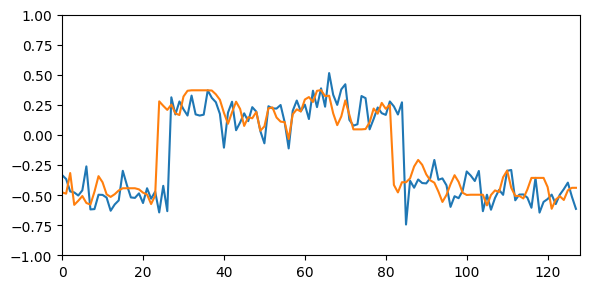

In [ ]:
hlp.plot1d(x_train[0], aug.discriminative_guided_warp(x_train, y_train)[0])
